## Imports

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
np.random.seed(42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image



## Data Preparation and augmentation

In [2]:
img=image.load_img("datasets/train/safe/1084211.jpg")

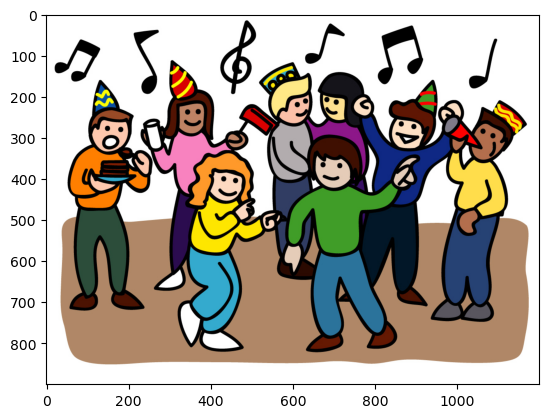

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("datasets/train/safe/1084211.jpg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
cv2.imread("datasets/train/safe/1084211.jpg").shape

(900, 1200, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
val=ImageDataGenerator(rescale=1/255)

In [7]:
# Create generators
train_generator = train.flow_from_directory(
    'datasets/train',
    target_size=(200, 200),
    batch_size=3,
    class_mode='categorical'
)

validation_generator = val.flow_from_directory(
    'datasets/val',
    target_size=(200, 200),
    batch_size=3,
    class_mode='categorical'
)


Found 381 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [8]:
import shutil
import os
train_dir = 'datasets/train'

# Define the path to the .ipynb_checkpoints directory
checkpoints_dir = os.path.join(train_dir, '.ipynb_checkpoints')

# Check if the .ipynb_checkpoints directory exists and remove it
if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(".ipynb_checkpoints directory has been removed.")
else:
    print(".ipynb_checkpoints directory does not exist.")

.ipynb_checkpoints directory does not exist.


In [9]:
train_generator.class_indices

{'adult_content': 0, 'safe': 1, 'unsafe': 2}

## Data distribution

Class Distribution: {0: 127, 1: 127, 2: 127}


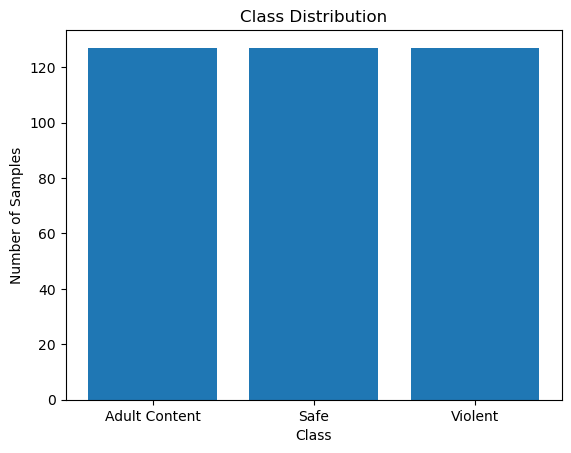

In [10]:
# Plot class distribution
class_counts = train_generator.classes
unique, counts = np.unique(class_counts, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xticks([0, 1, 2], ['Adult Content', 'Safe', 'Violent'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

## Model Training and evaluation

In [13]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      17,334,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,359,907 (66.22 MB)

 Trainable params: 17,359,907 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_fit=model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 51s 377ms/step - accuracy: 0.8607 - loss: 0.3377 - val_accuracy: 0.6000 - val_loss: 0.9390
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - accuracy: 0.9798 - loss: 0.0824 - val_accuracy: 0.6667 - val_loss: 1.6395
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 321ms/step - accuracy: 0.9840 - loss: 0.0800 - val_accuracy: 0.6667 - val_loss: 1.7692
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 325ms/step - accuracy: 0.9915 - loss: 0.0406 - val_accuracy: 0.6000 - val_loss: 2.5052
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 320ms/step - accuracy: 0.9987 - loss: 0.0069 - val_accuracy: 0.4667 - val_loss: 3.5827
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 351ms/step - accuracy: 0.9281 - loss: 0.2141 - val_accuracy: 0.6667 - val_loss: 0.8208
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 332ms/step - accuracy: 0.9996 - loss: 0.0067 - val_accuracy: 0.6333 - val_loss: 1.6697
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 320ms/step - accuracy: 1.0000 - loss: 0

## Save the model

In [19]:
from tensorflow.keras.models import save_model
save_model(model, 'keras_model_img.keras')
print("Model Saved")

Model Saved


In [31]:
import shutil
import os
train_dir = 'violence'

# Define the path to the .ipynb_checkpoints directory
checkpoints_dir = os.path.join(train_dir, '.ipynb_checkpoints')

# Check if the .ipynb_checkpoints directory exists and remove it
if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(".ipynb_checkpoints directory has been removed.")
else:
    print(".ipynb_checkpoints directory does not exist.")

.ipynb_checkpoints directory has been removed.


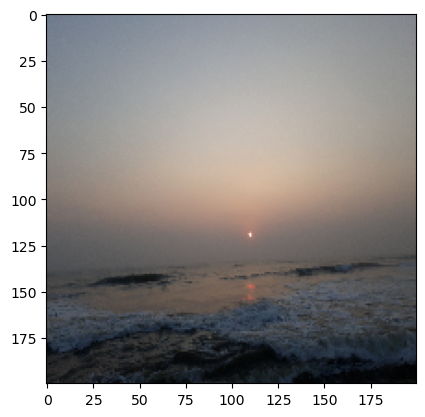

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
[[0. 1. 0.]]
Safe


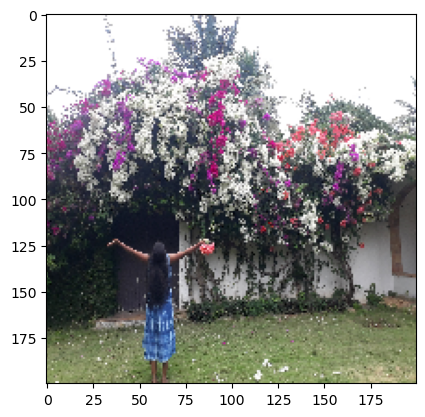

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0. 1. 0.]]
Safe


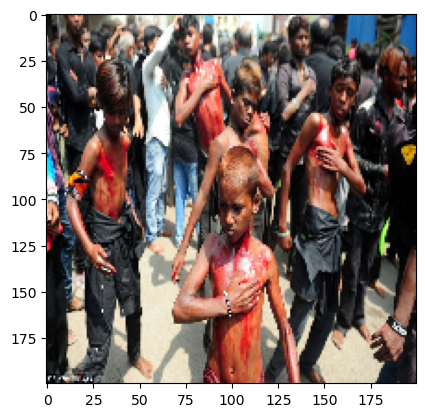

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0. 0. 1.]]
Violent


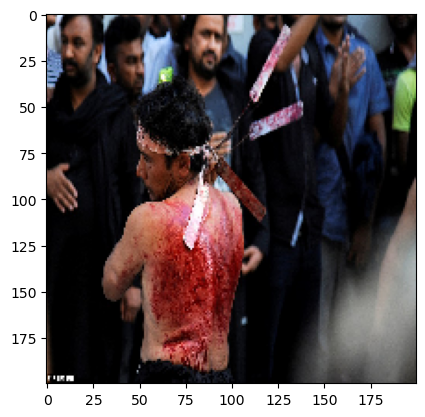

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0. 0. 1.]]
Violent


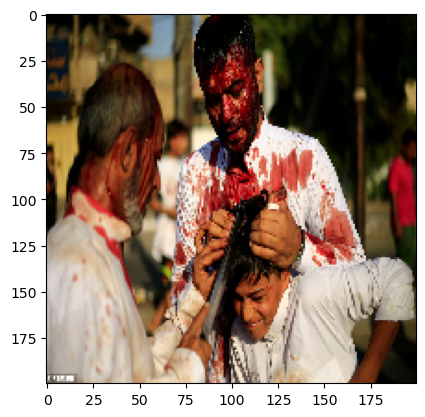

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0. 0. 1.]]
Violent


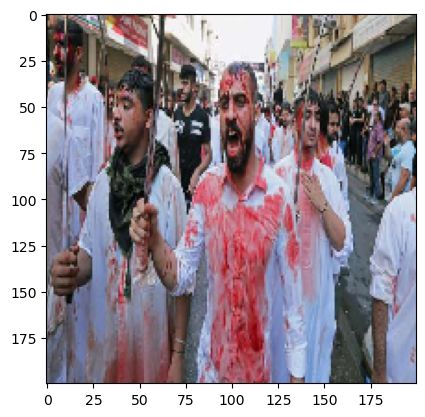

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0. 1. 0.]]
Safe


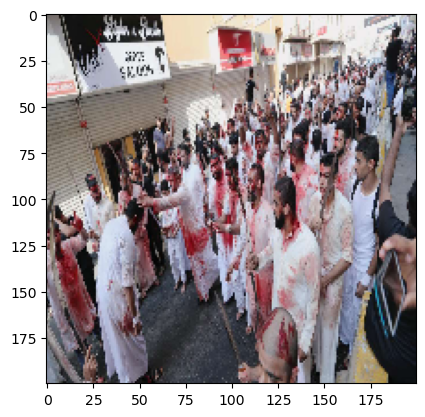

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0. 0. 1.]]
Violent


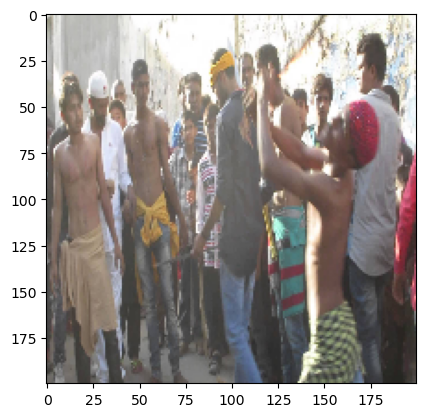

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0. 1. 0.]]
Safe


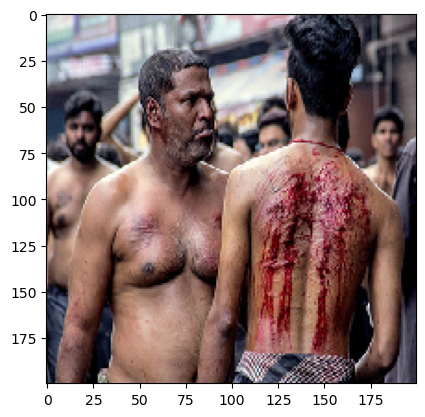

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0. 0. 1.]]
Violent


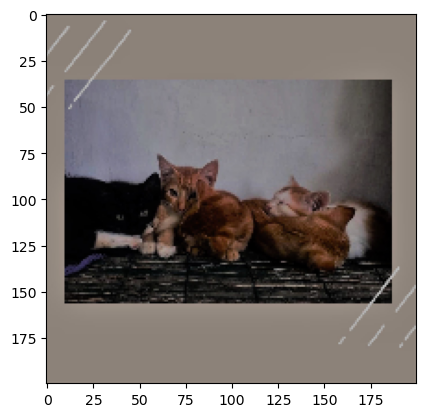

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0. 1. 0.]]
Safe


In [32]:

dir_path = 'violence'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '/' + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    print(val)

    predicted_class = np.argmax(val, axis=1)[0]  # Get the predicted class index
    if predicted_class == 0:
        print('Adult Content')
    elif predicted_class == 1:
        print('Safe')
    else:
        print('Violent')
